<a href="https://colab.research.google.com/github/Justdead12/Shark-Attack/blob/main/Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import re
from itertools import chain
%reload_ext google.colab.data_table

df = pd.read_csv('https://raw.githubusercontent.com/Justdead12/Shark-Attack/main/attacks.csv', encoding = 'cp1252')

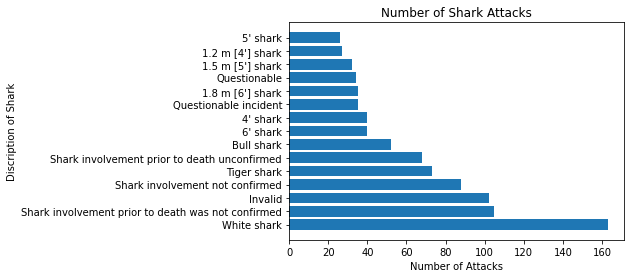


The White Shark is the most dangerous shark for humans


In [109]:
# What are the most dangerous types of sharks to humans?
df2 = df.drop(columns= ['Case Number', 'Year', 'Country', 'Area', 'Location', 'Sex ', 'Age', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'])
df2 = df2.dropna(subset=['Species '], how= 'all')
df2 = df2.rename(columns= {'Species ':'Species'})
number_of_attacks = df2.groupby('Species')['Species'].count().sort_values(ascending=False)[0:15]

fig, ax = plt.subplots()

ax.barh(number_of_attacks.index, number_of_attacks)
plt.xlabel('Number of Attacks')
plt.ylabel('Discription of Shark')
plt.title('Number of Shark Attacks')

plt.show()

print('\nThe White Shark is the most dangerous shark for humans')

In [110]:
# Are children more likely to be attacked by sharks?
df3 = df.drop(columns= ['Case Number', 'Type', 'Activity', 'Name', 'Injury', 'Species ', 'Year', 'Country', 'Area',
                        'Location', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href',
                        'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'])
df3.dropna(subset=['Age'], inplace=True)

def split_row(df, col, char):
    chainer = list(chain.from_iterable(col.str.split(char)))
    split = col.str.split(char).map(len)
    df = pd.DataFrame({'Date':np.repeat(df['Date'], split),
                       'Fatal (Y/N)': np.repeat(df['Fatal (Y/N)'], split),
                       'Age': chainer})
    return df

df3 = split_row(df3, df3['Age'], '&')
df3 = split_row(df3, df3['Age'], ',')
df4 = split_row(df3, df3['Age'], 'or')

df4['Age'] = df4['Age'].str.strip()
df4['Age'] = df4['Age'].str.strip('s')
df4['Age'] = (df4['Age'].replace({'"middle-age"': 50})
                        .replace({'"young"': None})
                        .replace({'(adult)': 20})
                        .replace({'Teen': 17})
                        .replace({'teen': 17})
                        .replace({'young': None})
                        .replace({'adult': 30})
                        .replace({'X': None})
                        .replace({'MAKE LINE GREEN': None})
                        .replace({'F': None})
                        .replace({'Elderly': 80})
                        .replace({'Ca. 33': 33})
                        .replace({'Both 11': 11})
                        .replace({'A.M.': None})
                        .replace({'>50': 51})
                        .replace({'9 or 10': 10})
                        .replace({'18 months': 1})
                        .replace({'9 months': 0})
                        .replace({'2 to 3 months': 0})
                        .replace({'': None})
                        .replace({'?': None})
                        .replace({'6½': 6})
                        .replace({str("60's"): 65})
                        .replace({'25 to 35': 30})
                        .replace({'16 to 18': 17})
                        .replace({', ': None})
                        .replace({'18 month': 1})
                        .replace({'mid-30': 35})
                        .replace({'mid-20': 25})
                        .replace({'9 month': 1})
                        .replace({str("60'"): 60})
                        .replace({'18 to 22': 20})
                        .replace({'20?': 20})
                        .replace({'2 to 3 month': 1})
                        .replace({'9 month': 1})
                        .replace({'2½': 1}))
df4 = df4.dropna(subset= ['Age'], how='all')
df4['Age'] = df4['Age'].astype(int)
df4 = df4.reset_index()

def age_under_18(df):
    count = 0
    for i in df:
      if i < 18:
        count += 1
    return count

def age_18_and_above(df):
    count = 0
    for i in df:
      if i >= 18:
        count += 1
    return count

attacked_children = age_under_18(df4['Age'])          
attacked_adults = age_18_and_above(df4['Age'])

print(f'Number of children attacted by sharks:\n{attacked_children}')
print(f'Number of adults attacted by sharks:\n{attacked_adults}')

print(f'\nAlthough some values are deleted, because they were not clearly adult or child, it is clear that adults are more likely to be attacked then children.')

Number of children attacted by sharks:
951
Number of adults attacted by sharks:
2549

Although some values are deleted, because they were not clearly adult or child, it is clear that adults are more likely to be attacked then children.


In [170]:
# Are shark attacks where sharks were provoked more or less dangerous?
df6 = df.drop(columns= ['Case Number', 'Age', 'Name', 'Injury', 'Species ', 'Year', 'Country', 'Area',
                        'Location', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href',
                        'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'])
df6.dropna(subset=['Type'], inplace=True)

# Delete unclear types.
df6['Type'] = df6['Type'].replace('Questionable', None)
df6['Type'] = df6['Type'].replace('Invalid', None)
df6.dropna(subset=['Type'], inplace=True)
# Set other types to provoked or unprovoked and change Activity when it is checked.

def make_provoked(col1, col2, name1):
  for i in col1:
    if i is not 'Provoked' or 'Unprovoked':
      df6.loc[df6[col2] == name1, col1] = 'Provoked'
      df6.loc[df6[col1] == 'Provoked', col2] = 'Checked'
      df6.loc[df6[col1] == 'Unprovoked', col2] = 'Checked'

def make_unprovoked(col1, col2, name1):
  for i in col1:
    if i is not 'Provoked' or 'Unprovoked':
      df6.loc[df6[col2] == name1, col1] = 'Unprovoked'
      df6.loc[df6[col1] == 'Provoked', col2] = 'Checked'
      df6.loc[df6[col1] == 'Unprovoked', col2] = 'Checked'

make_provoked('Type', 'Activity', 'Paddling')
make_provoked('Type', 'Activity', 'Fishing')
make_provoked('Type', 'Activity', 'Surfing')
make_provoked('Type', 'Activity', 'Kayaking')
make_provoked('Type', 'Activity', 'Rowing')
make_provoked('Type', 'Activity', 'Kayak Fishing')

make_unprovoked('Type', 'Activity', 'Swimming')
make_unprovoked('Type', 'Activity', 'Sea Disaster')
make_unprovoked('Type', 'Activity', 'Sea disaster')

df6.loc[df6['Activity'] != 'Checked', 'Type'] = 'Unprovoked'
df6.loc[df6['Type'] == 'Unprovoked', 'Activity'] = 'Checked'

# Count the fatal attack that were profoked or not.

only_fatal = df6.loc[df6['Fatal (Y/N)'] == 'Y']

def provoked():
  count = 0
  for i in only_fatal['Type']:
    if i == 'Provoked':
      count += 1
  return count

def unprovoked():
  count = 0
  for i in only_fatal['Type']:
    if i == 'Unprovoked':
      count += 1
  return count

print(f'Number of attacks provoked and fatal:\n{provoked()}')
print(f'Number of attacks unprovoked and fatal:\n{unprovoked()}')

print('\nIt depends on when you think an attack is provoked. When I Googled, most of the things\nI found were seen as provoked.')
print('So I counted a lot of attacks as provoked, though there are more unprovoked fatal shark\nattacks then provoked fatal shark attacks')

Number of attacks provoked and fatal:
23
Number of attacks unprovoked and fatal:
1363

It depends on when you think an attack is provoked. When I Googled, most of the things
I found were seen as provoked.
So I counted a lot of things as provoked, though there are more unprovoked fatal shark
attacks then provoked fatal shark attacks


In [181]:
# Are shark attacks where sharks were provoked more or less dangerous?
df7 = df.drop(columns= ['Case Number', 'Age', 'Name', 'Injury', 'Species ', 'Year', 'Country', 'Area',
                        'Location', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href',
                        'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23'])
df7.dropna(subset=['Type'], inplace=True)

count_activity = (df7['Activity'].value_counts())
display(count_activity.head(10))

print('\nThere are 2 types of activity that seems to attract more often sharks.\nThose are surfing and swimming')

Surfing         970
Swimming        869
Fishing         430
Spearfishing    333
Bathing         162
Wading          149
Diving          126
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64


There are 2 types of activity that seems to attract more often sharks.
Those are surfing and swimming
